In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
def charge_sequence_from_aa_chars(aa_char_sequence, aa2charge):
    """Helper function to convert AA residue sequence to charge sequence"""
    return [aa2charge[x] for x in aa_char_sequence]

def volume_sequence_from_aa_chars(aa_char_sequence, aa2volume):
    """Helper function to convert AA residue sequence to volume sequence"""
    return [aa2volume[x] for x in aa_char_sequence]

def zero_pad_sequence(sequence, pore_length_in_aa):
    """
    Zero pad charge, volume, or residue sequence with zeros of pore length.
    This helps with calculating the insertion and removal of the protein from
    the pore
    """
    return [0]*pore_length_in_aa + sequence + [0]*pore_length_in_aa

def get_charge_in_pore_vs_aa_idx(aa_char_sequence, aa2charge, pore_length_in_aa):
    """
    Calculates the charge in the nanopore vs amino acid index. We're assuming that
    the protein moves through as an unfolded rigid rod and as a fixed charged 
    described by the aa2charge mapping and that the pore is of length
    pore_length_in_aa where the pore length is in amino-acid spacing units of
    roughtly 0.33 nm. That means that a 10nm pore would have up to 33 amino acids
    inside.
    
    As an illustrative example, imagine 1 nm nanopore that (in this simplistic model)
    fits just three amino acids as shown below and that the molecule is moving from
    left to right.

        |          |
        |          |
        |----------|
  
     0   0  -1   0   1   0
     M   A   E   P   R   Q

        |----------|
        |          |
        |          |
        
    The total charge inside the pore is -1. Because the fifth amino acid 'A' has just 
    entered this model puts a charge of -1 at index 5.
    
    """
    
    charge_sequence = charge_sequence_from_aa_chars(aa_char_sequence, aa2charge)
    padded_charge_sequence = zero_pad_sequence(charge_sequence, pore_length_in_aa)
    
    charge_in_pore_vs_idx = []
    for aa_idx in range(0, len(padded_charge_sequence) - pore_length_in_aa):
        charge_in_pore = sum(padded_charge_sequence[aa_idx: aa_idx+pore_length_in_aa])
        charge_in_pore_vs_idx.append(charge_in_pore)
    return charge_in_pore_vs_idx

def get_volume_in_pore_vs_aa_idx(aa_char_sequence, aa2volume, pore_length_in_aa):
    """
    Calculates the charge in the nanopore vs amino acid index. Identical
    to get_charge_in_pore_vs_aa_idx but replaces aa2charge with aa2volume.
    """
    volume_sequence = volume_sequence_from_aa_chars(aa_char_sequence, aa2volume)
    padded_volume_sequence = zero_pad_sequence(volume_sequence, pore_length_in_aa)
    
    volume_in_pore_vs_idx = []
    for aa_idx in range(0, len(padded_volume_sequence) - pore_length_in_aa):
        volume_in_pore = sum(padded_volume_sequence[aa_idx: aa_idx+pore_length_in_aa])
        volume_in_pore_vs_idx.append(volume_in_pore)
    return volume_in_pore_vs_idx


In [34]:
#loading the data and taking a peek to see if it looks good, which it does
data_table = pd.read_csv('../data_raw/tau_sequence_data_2020-07-12.csv')
data_table.head(10)

,Position,Unnamed: 1,Residue,Charge,MW,Volume
0,1,NaN,M,0.0,149.21,0.180843
1,2,NaN,A,0.0,89.09,0.107977
2,3,NaN,E,-1.0,147.13,0.178322
3,4,NaN,P,0.0,115.13,0.139538
4,5,NaN,R,1.0,174.20,0.211130
5,6,NaN,Q,0.0,146.15,0.177134
6,7,NaN,E,-1.0,147.13,0.178322
7,8,NaN,F,0.0,165.19,0.200210
8,9,NaN,E,-1.0,147.13,0.178322
9,10,NaN,V,0.0,117.15,0.141986


In [35]:
#extract amino acid residue sequence, charge sequence, and volume sequence
sequence = data_table['Residue']
charge_sequence = data_table['Charge']
volume_sequence = data_table['Volume']

In [26]:
#build aa2charge and aa2volume mapping
aa2charge = {aa:charge for aa, charge in zip(sequence, charge_sequence)}
aa2volume = {aa:volume for aa, volume in zip(sequence, volume_sequence)}

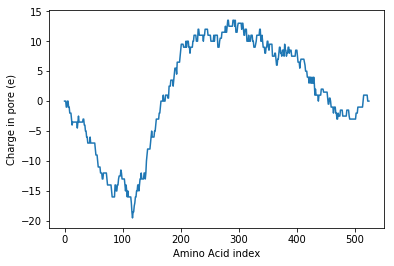

In [32]:
plt.plot(get_charge_in_pore_vs_aa_idx(sequence, aa2charge, pore_length_in_aa=84))
plt.xlabel('Amino Acid index')
plt.ylabel('Charge in pore (e)')
plt.show()

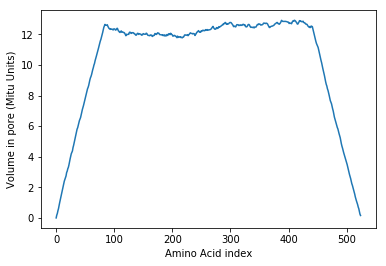

In [33]:
plt.plot(get_volume_in_pore_vs_aa_idx(sequence, aa2volume, pore_length_in_aa=84))
plt.xlabel('Amino Acid index')
plt.ylabel('Volume in pore (Mitu Units)')
plt.show()